<a href="https://colab.research.google.com/github/tmehtiyev2019/Applied-Machine-Learning-Research/blob/main/clustering_algorithms_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 32.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039167 sha256=e949f9a187508e59fb997133adc99ba028d256a84a9d603602fa3dce82089008
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.2
    Uninstalling Cython-3.0.2:
      Successfully uninstalled Cython-3.0.2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


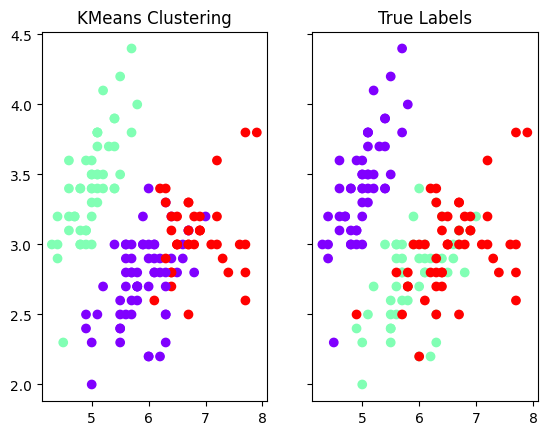

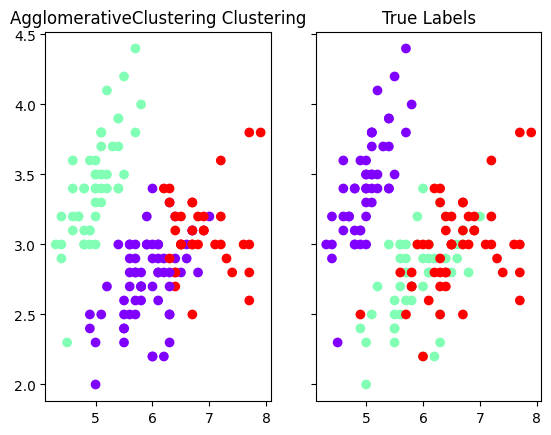

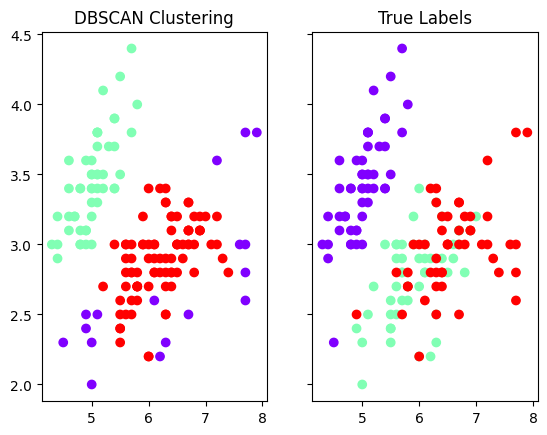

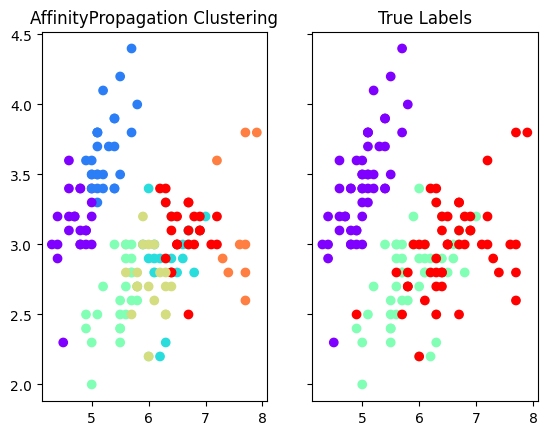

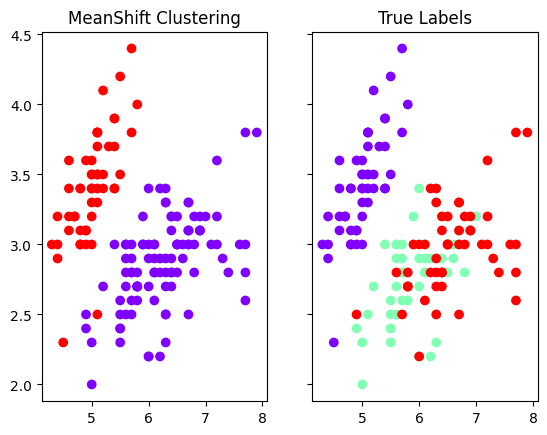

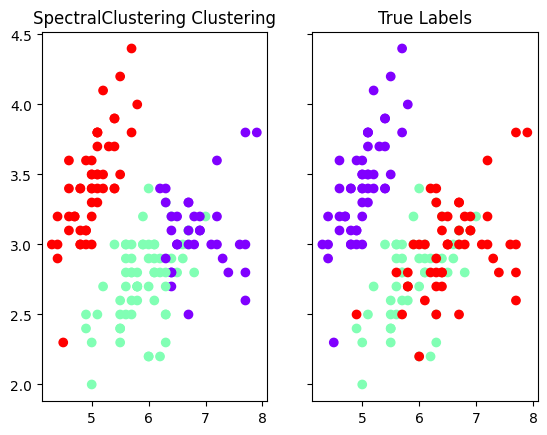

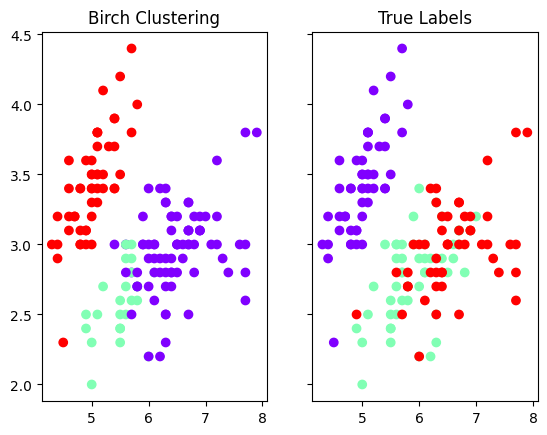

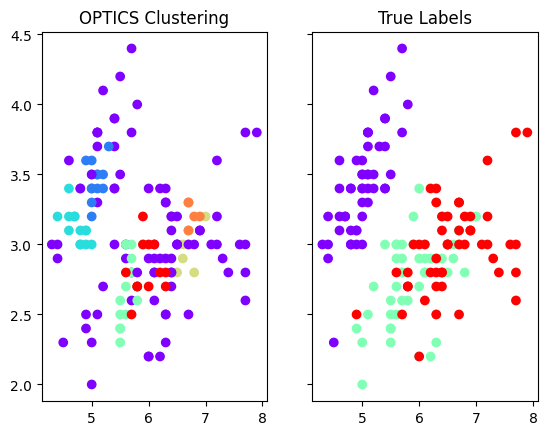

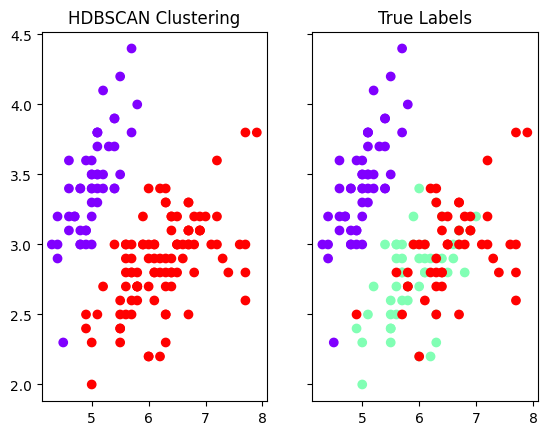

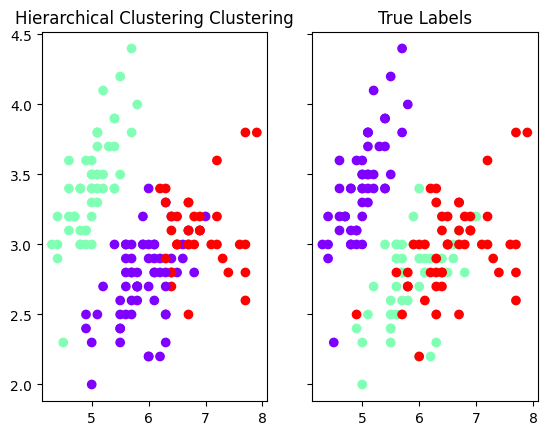

                 Algorithm  Adjusted Rand Index
5       SpectralClustering             0.745504
1  AgglomerativeClustering             0.731199
9  Hierarchical Clustering             0.731199
0                   KMeans             0.730238
6                    Birch             0.609625
8                  HDBSCAN             0.568116
4                MeanShift             0.558371
2                   DBSCAN             0.520619
3      AffinityPropagation             0.481172
7                   OPTICS             0.109599


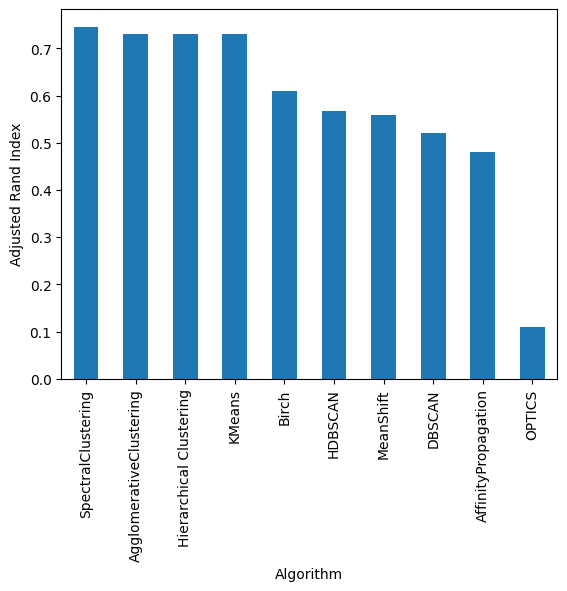

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import (
    KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation,
    MeanShift, SpectralClustering, Birch, OPTICS
)
import hdbscan
import pandas as pd
from sklearn.metrics import adjusted_rand_score
import numpy as np

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y_true = iris.target

# Define clustering algorithms
algorithms = {
    'KMeans': KMeans(n_clusters=3),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'AffinityPropagation': AffinityPropagation(),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters=3),
    'Birch': Birch(n_clusters=3),
    'OPTICS': OPTICS(min_samples=5),
    'HDBSCAN': hdbscan.HDBSCAN(min_samples=5),
    'Hierarchical Clustering': AgglomerativeClustering(n_clusters=3)  # Alias for AgglomerativeClustering
}

# Apply algorithms and visualize the results
for name, algorithm in algorithms.items():
    algorithm.fit(X)
    labels = algorithm.labels_

    # Handle the case where the algorithm doesn't assign a label to an outlier
    if np.min(labels) == -1:
        labels += 1

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.set_title(f'{name} Clustering')
    ax1.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
    ax2.set_title('True Labels')
    ax2.scatter(X[:, 0], X[:, 1], c=y_true, cmap='rainbow')
    plt.show()

# Compute adjusted Rand index
results = {}
for name, algorithm in algorithms.items():
    labels = algorithm.labels_
    # Handle the case where the algorithm doesn't assign a label to an outlier
    if np.min(labels) == -1:
        labels += 1
    score = adjusted_rand_score(y_true, labels)
    results[name] = score

# Create a DataFrame for easier visualization
results_df = pd.DataFrame(list(results.items()), columns=['Algorithm', 'Adjusted Rand Index'])
results_df = results_df.sort_values(by='Adjusted Rand Index', ascending=False)  # Sort the results

# Print the sorted results
print(results_df)

# Plot the results
results_df.plot(x='Algorithm', y='Adjusted Rand Index', kind='bar', legend=None)
plt.ylabel('Adjusted Rand Index')
plt.show()
